In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
#Conv2D: A convolutional layer that applies filters to detect features.
#MaxPooling2D: A pooling layer that reduces the spatial dimensions.
#Flatten: Flattens the input (e.g., a 2D feature map) into a 1D vector.
#Dense: A fully connected layer used for the output or hidden layers.

In [26]:
# Load the dataset from local path
trainPath = r"D:\Work\python\dl_clg\datasets\fashion\fashion-mnist_train.csv"
testPath = r"D:\Work\python\dl_clg\datasets\fashion\fashion-mnist_test.csv"
traindata = pd.read_csv(trainPath)
testdata = pd.read_csv(testPath)
data = pd.concat([traindata, testdata])

In [27]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y = data['label'].values
x = data.drop(columns=['label']).values

In [29]:
y = to_categorical(y) 
x = x.reshape(-1,28,28,1)/255.0 
#-1: The first dimension, inferred based on the data size (e.g., the number of images).
#28, 28: Specifies the height and width of each image (28x28 pixels).
#1: The last dimension, representing the color channels. A value of 1 indicates grayscale.

In [30]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=.25)

In [31]:
model = Sequential([
    Conv2D(28, (3,3) , activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(62, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax') # 10 classes of dataset
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model.fit(x_train,y_train, epochs=10, batch_size=64 , validation_data=(x_test , y_test))

Epoch 1/10
821/821 [==============================] - 7s 7ms/step - loss: 0.6150 - accuracy: 0.7797 - val_loss: 0.3821 - val_accuracy: 0.8629
Epoch 2/10
821/821 [==============================] - 5s 7ms/step - loss: 0.4039 - accuracy: 0.8567 - val_loss: 0.3275 - val_accuracy: 0.8823
Epoch 3/10
821/821 [==============================] - 5s 7ms/step - loss: 0.3555 - accuracy: 0.8724 - val_loss: 0.3050 - val_accuracy: 0.8898
Epoch 4/10
821/821 [==============================] - 5s 6ms/step - loss: 0.3235 - accuracy: 0.8834 - val_loss: 0.2901 - val_accuracy: 0.8961
Epoch 5/10
821/821 [==============================] - 5s 7ms/step - loss: 0.2995 - accuracy: 0.8922 - val_loss: 0.2724 - val_accuracy: 0.9020
Epoch 6/10
821/821 [==============================] - 5s 7ms/step - loss: 0.2788 - accuracy: 0.8998 - val_loss: 0.2594 - val_accuracy: 0.9082
Epoch 7/10
821/821 [==============================] - 5s 6ms/step - loss: 0.2597 - accuracy: 0.9049 - val_loss: 0.2439 - val_accuracy: 0.9110
Epoch 

In [23]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


547/547 [==============================] - 2s 3ms/step - loss: 0.2492 - accuracy: 0.9113
Test Accuracy: 91.13%


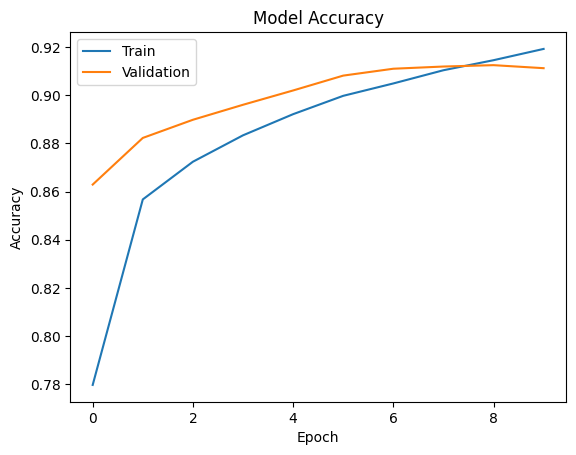

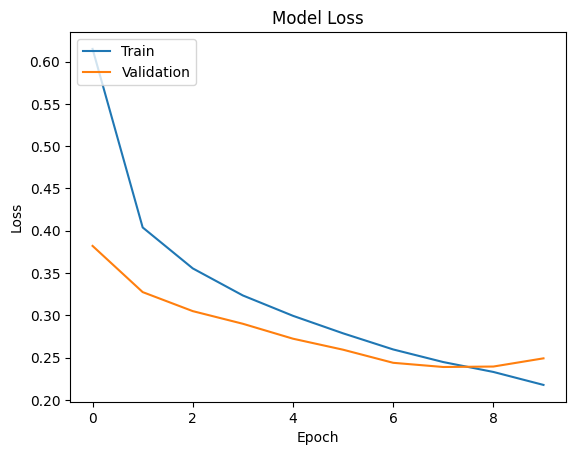

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
